<a href="https://colab.research.google.com/github/sahilskumar/Reddit-Sentimental-Analysis/blob/master/Data%20Importing%20and%20Analsysis(NLTK).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# iPython's display module, which will let us control the clearing of printed output inside loops
from IPython import display
import math

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pprint import pprint #pprint means pretty print JSON and lists

import nltk
sns.set(style='darkgrid', context='talk', palette='Dark2')

#importing libraries
!pip install praw
nltk.download('vader_lexicon')

# REDDIT API VIA PRAW

In [2]:
import praw
reddit = praw.Reddit(client_id='FzDNWM5E_IghdQ',
                     client_secret='pznQGFiCREh9hlAnwwIBRqhn4B0',
                     user_agent='sahilkumar')
headlines = set()
for submission in reddit.subreddit('politics').new(limit=None):
  #limit none means latest 1000 headlines
  headlines.add(submission.title)
  display.clear_output()
  print(len(headlines))

963


In [3]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []

for line in headlines:
  pol_score = sia.polarity_scores(line)
  pol_score['headline'] = line
  results.append(pol_score)

pprint(results[:3])

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[{'compound': 0.0,
  'headline': 'Infecting People Isn’t a Religious Right',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': "Yup, that's Minnesota congressional candidate David Sandbeck's "
              'ad on PornHub',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.5106,
  'headline': 'U.S. Says Signs Syria May Be Using Chemical Weapons, Warns of '
              'Quick Response',
  'neg': 0.281,
  'neu': 0.719,
  'pos': 0.0}]


In [0]:
df = pd.DataFrame.from_records(results)

In [5]:
df.head(4) #compound show the sentiment value (-1(extremely negative) to +1(extremly positive))

,compound,headline,neg,neu,pos
0,0.0000,Infecting People Isn’t a Religious Right,0.000,1.000,0.0
1,0.0000,"Yup, that's Minnesota congressional candidate ...",0.000,1.000,0.0
2,-0.5106,U.S. Says Signs Syria May Be Using Chemical We...,0.281,0.719,0.0
3,-0.1280,Bernie Sanders to demand Walmart workers get a...,0.111,0.889,0.0


In [6]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2 , 'label'] = -1
df.head()

,compound,headline,neg,neu,pos,label
0,0.0000,Infecting People Isn’t a Religious Right,0.000,1.000,0.0,0
1,0.0000,"Yup, that's Minnesota congressional candidate ...",0.000,1.000,0.0,0
2,-0.5106,U.S. Says Signs Syria May Be Using Chemical We...,0.281,0.719,0.0,-1
3,-0.1280,Bernie Sanders to demand Walmart workers get a...,0.111,0.889,0.0,0
4,-0.7430,Justin Amash calls Trump 'irresponsible' after...,0.387,0.613,0.0,-1


In [0]:
df2 = df[['headline','label']]
df2.to_csv('reddit_headlines_labels_2', mode='a' ,encoding = 'utf-8', index=False)

# Dataset info and statistics

In [0]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['Trump is expected to tap Ken Cuccinelli for top DHS role on immigration',
 'As Suicides Rise, Insurers Find Ways to Deny Mental Health Care',
 'The great Fox News debate consuming Democrats: The choice of whether to appear on the network illustrates deeper strategic divides in the Democratic presidential primary.',
 "Good Feelings On Economy Don't Help Trump, Quinnipiac University National Poll Finds; Biden Is Only Contender With Positive Score",
 'U.S. Supreme Court sides with Native American elk hunter']

Negative headlines:

['Nadler: We’ll Hold McGahn in Contempt if He Skips Congressional Testimony',
 "Kamala Harris hits Biden over 'mass incarceration' from crime bill",
 'Trump is planning a cruel twist in border policy: Family detention -- it’s no better than family separation.',
 'Bill to Ban Circus Animal Suffering Set for Introduction in US Congress',
 'AP FACT CHECK: Trump cries ‘treason’ over campaign scrutiny']


In [0]:
print(df.label.value_counts())
print(df.label.value_counts(normalize=True)*100) #shows percentage

 0    433
-1    339
 1    180
Name: label, dtype: int64
 0    45.483193
-1    35.609244
 1    18.907563
Name: label, dtype: float64


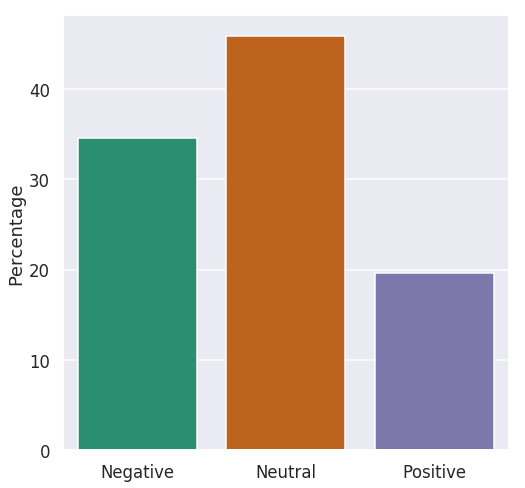

In [0]:
fig,ax = plt.subplots(figsize=(8,8));

counts = df.label.value_counts(normalize=True)*100

sns.barplot(x=counts.index, y=counts, ax=ax);
ax.set_ylabel('Percentage');
ax.set_xticklabels(['Negative','Neutral','Positive'])
plt.show()

# Tokenizer and StopWords(Data Preprocessing)

In [0]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize,RegexpTokenizer
example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

tokenizer = RegexpTokenizer(r'\w+') #does not contain punctuation only consider workds
tokenizer.tokenize(example)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


['This',
 'is',
 'an',
 'example',
 'sentence',
 'However',
 'it',
 'isn',
 't',
 'a',
 'very',
 'informative',
 'one']

In [0]:
#removing stopwords like ’the, ’is’, ’and’, ’what’, etc. that are irrelevant to sentiment and dont provide any valuable information
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words[:20])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [0]:
#Word Distribution
def process_text(headlines):
  tokens = []
  for line in headlines:
    token = tokenizer.tokenize(line)
    token = [t.lower() for t in token if t.lower() not in stop_words]
    tokens.extend(token)
  return tokens
    

In [0]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('trump', 74),
 ('house', 16),
 ('2020', 14),
 ('u', 12),
 ('court', 12),
 ('says', 11),
 ('fox', 10),
 ('supreme', 10),
 ('iran', 10),
 ('democrats', 9),
 ('democratic', 9),
 ('american', 9),
 ('president', 9),
 ('biden', 8),
 ('bill', 8),
 ('abortion', 8),
 ('white', 8),
 ('would', 8),
 ('buttigieg', 8),
 ('like', 8)]

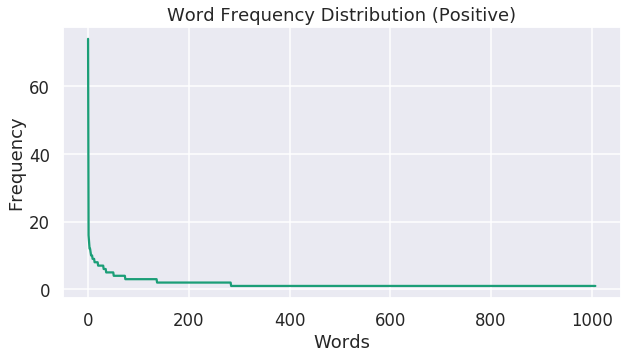

In [0]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

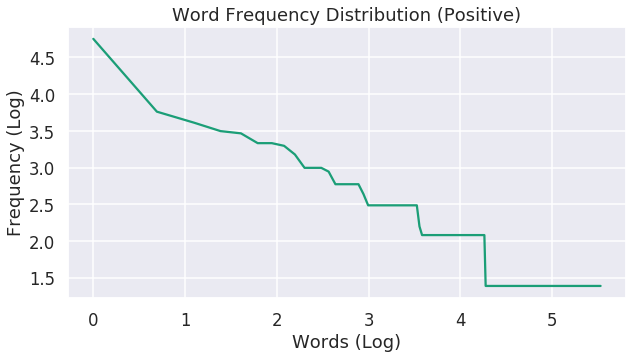

In [0]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [0]:
#negative words
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('trump', 141),
 ('war', 51),
 ('iran', 38),
 ('house', 26),
 ('us', 25),
 ('bank', 23),
 ('china', 21),
 ('report', 20),
 ('says', 20),
 ('trade', 20),
 ('news', 20),
 ('deutsche', 19),
 ('fox', 19),
 ('ban', 18),
 ('end', 17),
 ('suspicious', 17),
 ('mcgahn', 16),
 ('abortion', 15),
 ('congress', 14),
 ('accused', 14)]

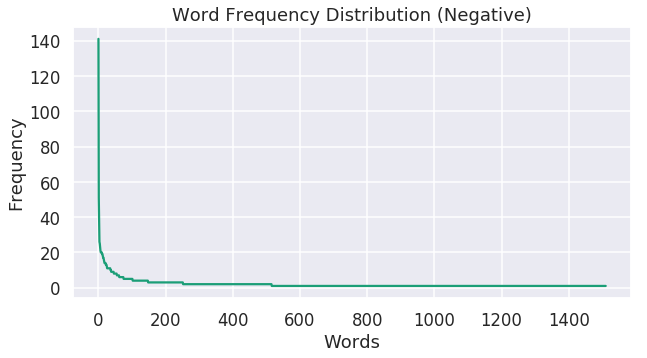

In [0]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

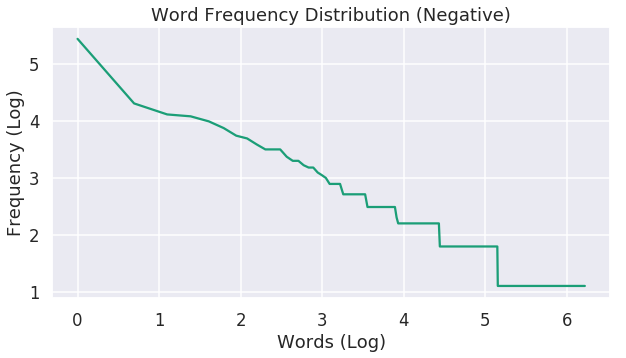

In [0]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()